<font size="5"><b>Import Library</b></font>

In [22]:
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.metrics as sm
import seaborn as sns

from pandas.plotting import scatter_matrix

from scipy.stats import pearsonr
from scipy.stats import spearmanr

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics import v_measure_score
from pandas.plotting import scatter_matrix

from sklearn.metrics import confusion_matrix, classification_report

<font size="5"><b>Import Data</b></font>

In [104]:
df = pd.read_csv('dataset/nilaisd.csv')
dfx = pd.read_csv('dataset/nilaisd.csv')

In [107]:
start_time = time.time()

scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(dfx.iloc[:,:12])
dfx.iloc[:,:12] = scaler.transform(dfx.iloc[:,:12])

end_time = time.time()
print("Durasi %g detik" % (end_time - start_time))

Durasi 0.0141244 detik


In [108]:
df.head()

,no_urut,pai,ppkn,bindo,mtk,ipa,ips,sbdp,pjok,bta,bdaerah,bing,jumlah,ratarata
0,1,57.5,80,80,48,80,87,43,67,56.0,30,64,692.5,62.95
1,2,67.5,90,77,84,90,90,73,70,84.0,77,76,878.5,79.86
2,3,70.0,77,83,72,77,83,70,60,97.5,83,84,856.5,77.86
3,4,72.5,90,80,76,90,83,87,67,68.0,83,80,876.5,79.68
4,5,52.5,83,73,56,77,77,50,74,44.0,87,56,729.5,66.32


In [109]:
dfx.head()

,no_urut,pai,ppkn,bindo,mtk,ipa,ips,sbdp,pjok,bta,bdaerah,bing,jumlah,ratarata
0,0.000000,0.484848,0.60,0.666667,0.223881,0.682540,0.821918,0.219178,0.569231,0.476190,0.213483,0.64,692.5,0.515507
1,0.011628,0.606061,0.80,0.616667,0.761194,0.841270,0.863014,0.630137,0.615385,0.809524,0.741573,0.76,878.5,0.820411
2,0.023256,0.636364,0.54,0.716667,0.582090,0.634921,0.767123,0.589041,0.461538,0.970238,0.808989,0.84,856.5,0.784349
3,0.034884,0.666667,0.80,0.666667,0.641791,0.841270,0.767123,0.821918,0.569231,0.619048,0.808989,0.80,876.5,0.817166
4,0.046512,0.424242,0.66,0.550000,0.343284,0.634921,0.684932,0.315068,0.676923,0.333333,0.853933,0.56,729.5,0.576271


<font size="5"><b>Correlation</b></font>

In [110]:
#df.corr()

In [111]:
#sns.heatmap(df.corr())

In [112]:
#scatter_matrix(df)

In [113]:
#plt.scatter(df.bing, df.ratarata)

<font size="5"><b>Elbow Curve</b></font>

Text(0.5, 1.0, 'Elbow curve')

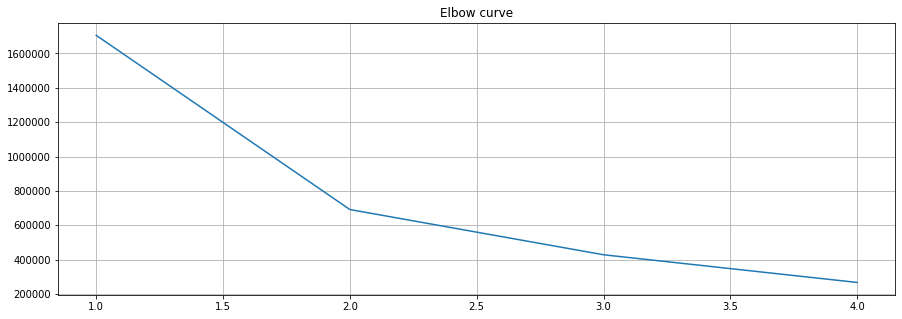

In [114]:
#N cluster optimal adalah 2
#Metode untuk mencari nilai N yang cocok untuk suatu dataset
distorsions = []
for k in range(1, 5):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(1, 5), distorsions)
plt.grid(True)
plt.title('Elbow curve')

In [116]:
X = df[['ratarata','bing']]
X_ = dfx[['ratarata','bing']]

<font size="5"><b>Model K-Means</b></font>

In [119]:
#Random KMeans, normal data
clustering = KMeans(n_clusters=2, init='random',random_state = None, max_iter=300)
clustering.fit(df)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=2,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

In [120]:
#Random KMeans, scaled data
clustering2 = KMeans(n_clusters=2, init='k-means++',random_state = None,max_iter=300)
clustering2.fit(dfx)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [121]:
y_kmeans = clustering.predict(df)

In [122]:
y_kmeans2 = clustering2.predict(dfx)

In [123]:
pd.DataFrame(clustering.cluster_centers_)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,45.295082,80.475410,83.557377,78.622951,73.147541,83.721311,79.590164,73.819672,74.098361,80.073770,80.049180,74.409836,861.565574,78.323607
1,40.961538,54.132308,73.576923,63.192308,55.769231,64.230769,62.884615,53.230769,53.961538,51.947308,54.730769,49.653846,637.310385,57.937308


In [124]:
pd.DataFrame(clustering2.cluster_centers_)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.515059,0.763338,0.671148,0.643716,0.599217,0.741608,0.720413,0.641365,0.678436,0.762783,0.775833,0.744098,861.565574,0.792708
1,0.464669,0.444028,0.471538,0.386538,0.339839,0.432234,0.491570,0.359326,0.368639,0.427944,0.491357,0.496538,637.310385,0.425123


In [125]:
clustering.inertia_

691582.3918173392

<font size="5"><b>Plotting Data</b></font>

Unscaled data


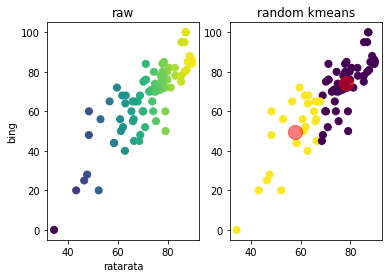

In [143]:
print("Unscaled data")
plt.subplot(1,2,1)
plt.scatter(X.ratarata, X.bing, c=df.jumlah, s=50, cmap='viridis')
plt.xlabel('ratarata')
plt.ylabel('bing')
plt.title('raw')

plt.subplot(1,2,2)
plt.scatter(X.ratarata, X.bing, c=clustering.labels_, s=50, cmap='viridis')
plt.title('random kmeans')

centers = clustering.cluster_centers_
plt.scatter(centers[:,13], centers[:,11], c='red', s=200, alpha=0.5)
plt.show()

Scaled Data


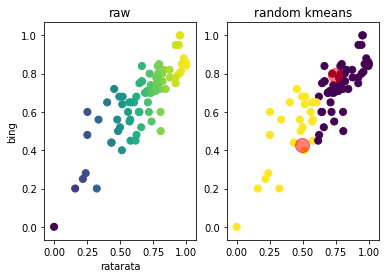

In [144]:
print("Scaled Data")
plt.subplot(1,2,1)
plt.scatter(X_.ratarata, X_.bing, c=dfx.jumlah, s=50, cmap='viridis')
plt.xlabel('ratarata')
plt.ylabel('bing')
plt.title('raw')

plt.subplot(1,2,2)
plt.scatter(X_.ratarata, X_.bing, c=clustering2.labels_, s=50, cmap='viridis')
plt.title('random kmeans')

centers2 = clustering2.cluster_centers_
plt.scatter(centers2[:,11], centers2[:,13], c='red', s=200, alpha=0.5)
plt.show()

<font size="5"><b>Silhouette Score</b></font>

In [145]:
print("Silhouette Score Unscaled: ", sm.silhouette_score(X, clustering.labels_, metric='euclidean',sample_size=300))
print("Silhouette Score Scaled: ", sm.silhouette_score(X_, clustering2.labels_, metric='euclidean',sample_size=300))

Silhouette Score Unscaled:  0.4468538736218539
Silhouette Score Scaled:  0.49915555203191


In [146]:
#Perbedaan jumlah cluster pada Kmeans++ dan Random
cl1 = clustering.labels_
zero = 0
one = 0
for i in cl1:
    if i==1:
        one+=1
    else:
        zero+=1

print(zero, one)

61 26


In [147]:
cl2 = clustering2.labels_
zero2 = 0
one2 = 0
for i in cl2:
    if i==1:
        one2+=1
    else:
        zero2+=1

print(zero2, one2)

61 26
